In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../00_raw_data/loops_rmsd.csv')

In [3]:
df.head()

,mut_mnah,wt_nadh,wt_mnah
0,1.481966e-07,0.000000,1.685874e-07
1,4.262996e-01,0.552477,4.184967e-01
2,5.834489e-01,0.815436,4.072890e-01
3,5.886668e-01,0.613059,4.460981e-01
4,5.831392e-01,0.462317,4.642304e-01


In [4]:
df_agg = (pd.melt(df, var_name='label', value_name='loop_rmsd')
            .groupby('label')
            .agg({'loop_rmsd' : ['mean', 'std']})
         ).reset_index()

In [5]:
df_agg.to_csv('../00_raw_data/loops_rmsd_agg.csv', index=False)
df_agg

label loop_rmsd          
                 mean       std
0  mut_mnah  0.748585  0.080487
1   wt_mnah  0.938173  0.126241
2   wt_nadh  0.746172  0.105083

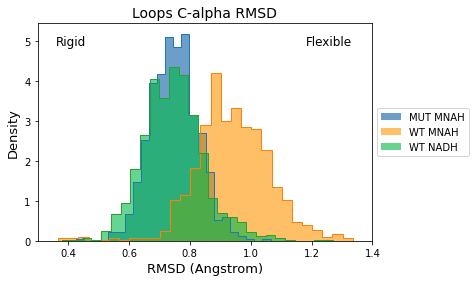

In [6]:
plt.hist(df['mut_mnah'], label='MUT MNAH', density=True, bins=40, alpha=0.6, color='#0C5DA5')
plt.hist(df['mut_mnah'], density=True, bins=40, color='C0', histtype='step')

plt.hist(df['wt_mnah'], label='WT MNAH', density=True, bins=40, alpha=0.6, color='#FF9500')
plt.hist(df['wt_mnah'], density=True, bins=40, color='C1', histtype='step')

plt.hist(df['wt_nadh'], label='WT NADH', density=True, bins=40, alpha=0.6, color='#00B945')
plt.hist(df['wt_nadh'], density=True, bins=40, color='C2', histtype='step')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Loops C-alpha RMSD', size=14)
plt.xlabel('RMSD (Angstrom)', size=13)
plt.ylabel('Density', size=13)
plt.xlim([0.3, 1.4])

ax = plt.gca()
plt.text(0.1, 0.9, 'Rigid', transform=ax.transAxes, ha='center', size=12)
plt.text(0.87, 0.9, 'Flexible', transform=ax.transAxes, ha='center', size=12)

plt.savefig('loop_flex.png')